# Demo 2: Plot the work of specific artists

In [1]:
import numpy as np
import cv2
import scipy.stats

import matplotlib.pyplot as plt

import os
import sys
sys.path.append('..')

import image_measures
import visual_plot

In [9]:
# path to your wikiart images folder
wikiart_path = '/l/vision/snorlax/sgoree/contemporary_art/american_expressionists/Expressionists_download/'

In [10]:
# artists to plot
artist_names = ['jackson-pollock', 'pablo-picasso', 'yayoi-kusama']

In [5]:
image_paths = []
years = []
names = []
for path in os.listdir(wikiart_path):
    if path in artist_names:
        subdir = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(wikiart_path + path)) for f in fn]
        images = [s for s in subdir if s.split('.')[-1] in ('jpg', 'gif', 'png')]
        image_paths += images
        years += [i.split('/')[-2] for i in images]
        names += [i.split('/')[-3] for i in images]

In [6]:
# compute colorfulness and complexity scores for the images we've selected

colorfulness = []
complexity = []
for image_path in image_paths:
    try:
        colorfulness.append(image_measures.colorfulness(cv2.imread(image_path)))
        complexity.append(image_measures.complexity(cv2.imread(image_path)))
    except Exception as e:
        print(e)
        print(path)
        colorfulness.append(np.nan)
        complexity.append(np.nan)

In [7]:
colorfulness = np.array(colorfulness)
complexity = np.array(complexity)
years = np.array(years)
names = np.array(names)

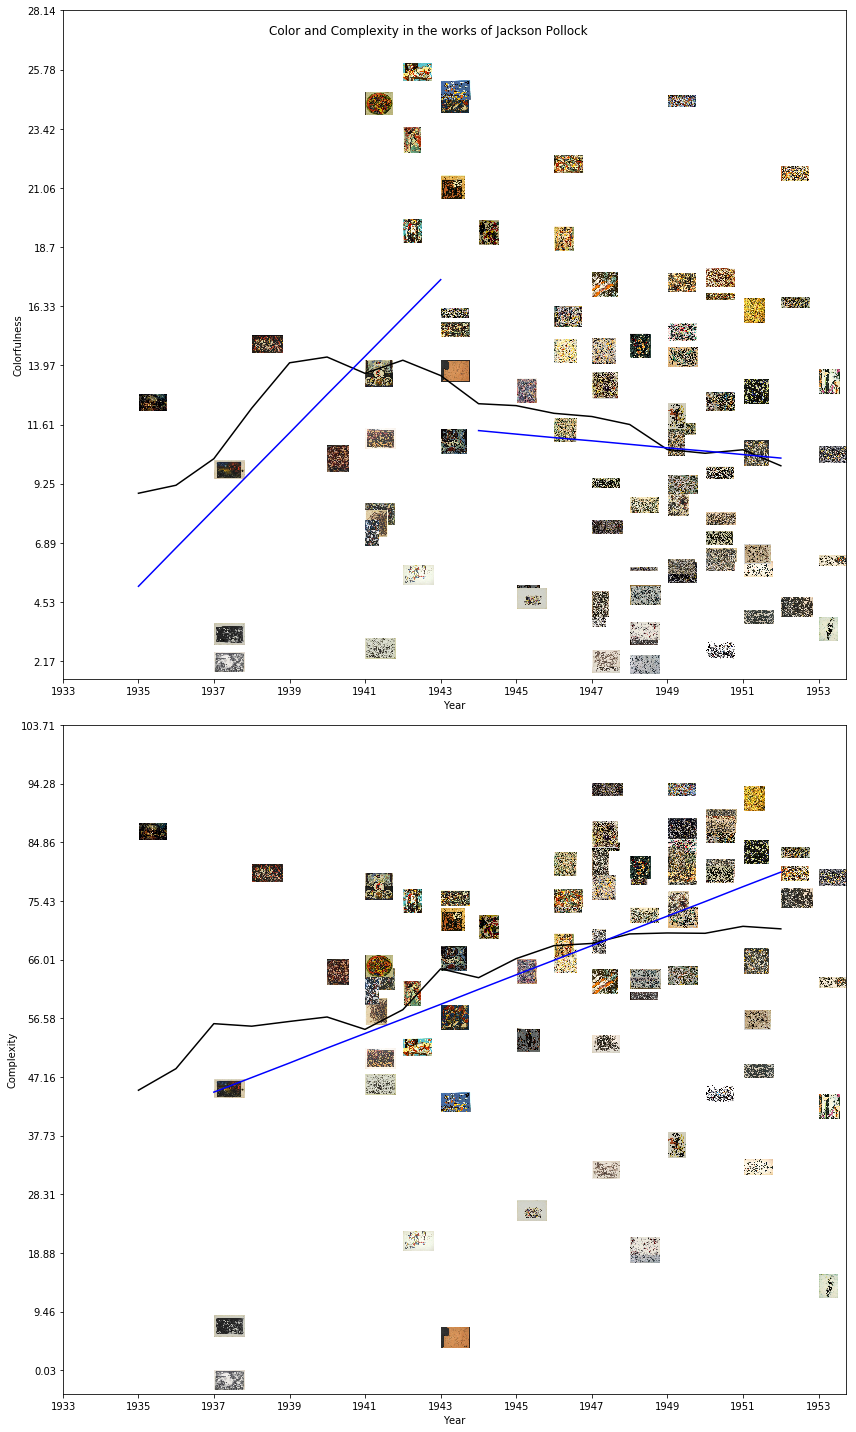

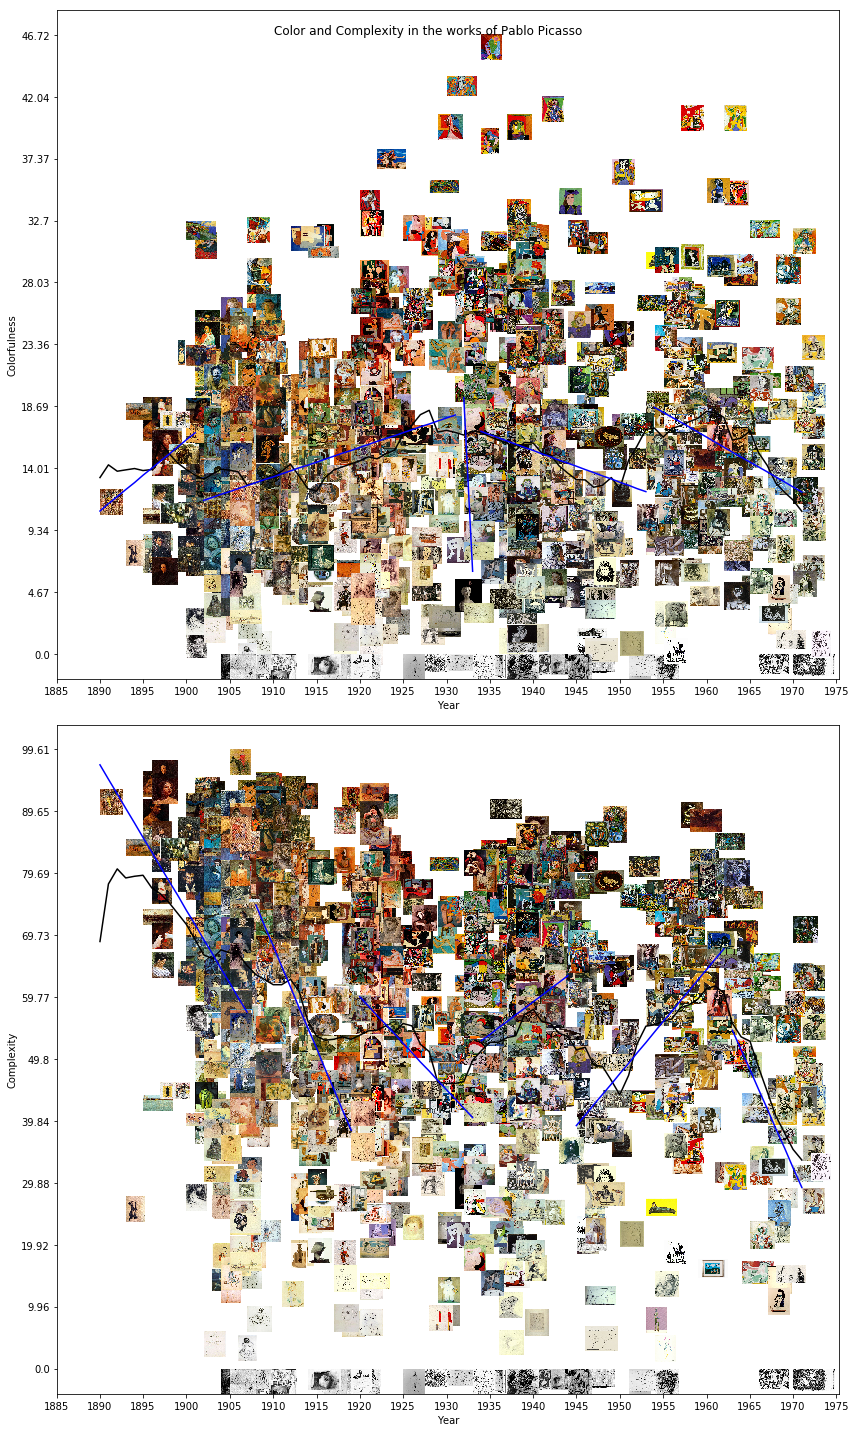

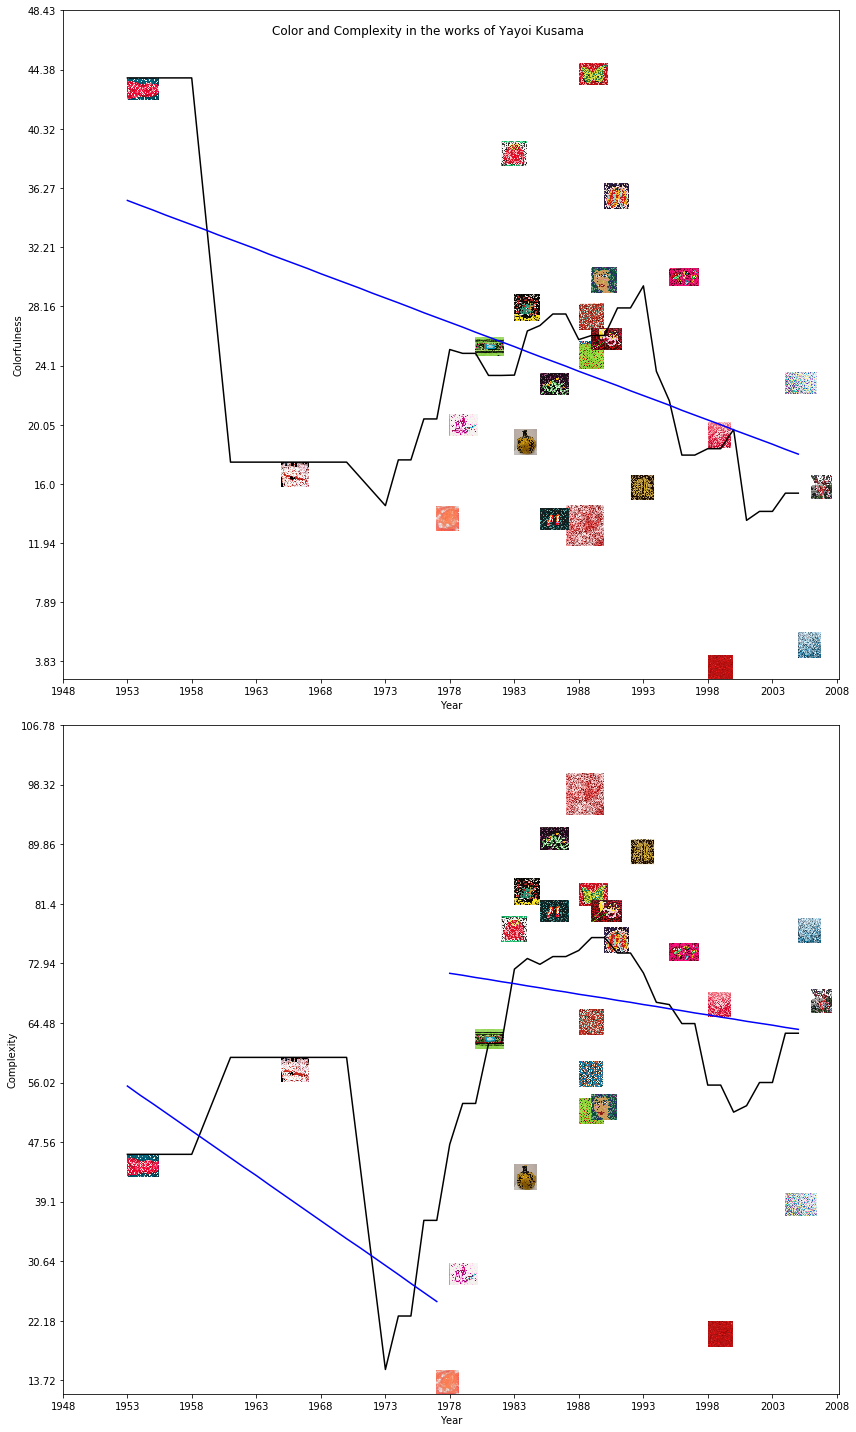

In [8]:
for artist in artist_names:
    # filter out unknown-year and select just the works by this artist
    mask = (years != 'unknown-year') & (names == artist)
    years_no_nan = np.array([int(y) for y in np.array(years)[mask]])
    colorfulness_no_nan = colorfulness[mask]
    complexity_no_nan = complexity[mask]
    image_paths_no_nan = np.array(image_paths)[mask]
    
    # plot images, running 5-year mean without error bars, and linear periodization
    fig, ax = plt.subplots(2,1, figsize=(12,20))
    visual_plot.visual_plot(years_no_nan, colorfulness_no_nan, image_paths_no_nan, ax=ax[0], window_size=5, error_bars=False, target_image_resolution=75)
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Colorfulness')
    visual_plot.visual_plot(years_no_nan, complexity_no_nan, image_paths_no_nan, ax=ax[1], window_size=5, error_bars=False, target_image_resolution=75)
    ax[1].set_xlabel('Year')
    ax[1].set_ylabel('Complexity')
    name = artist.split('-')
    plt.suptitle('Color and Complexity in the works of ' + ' '.join(name).title())
    plt.tight_layout()
    plt.show()

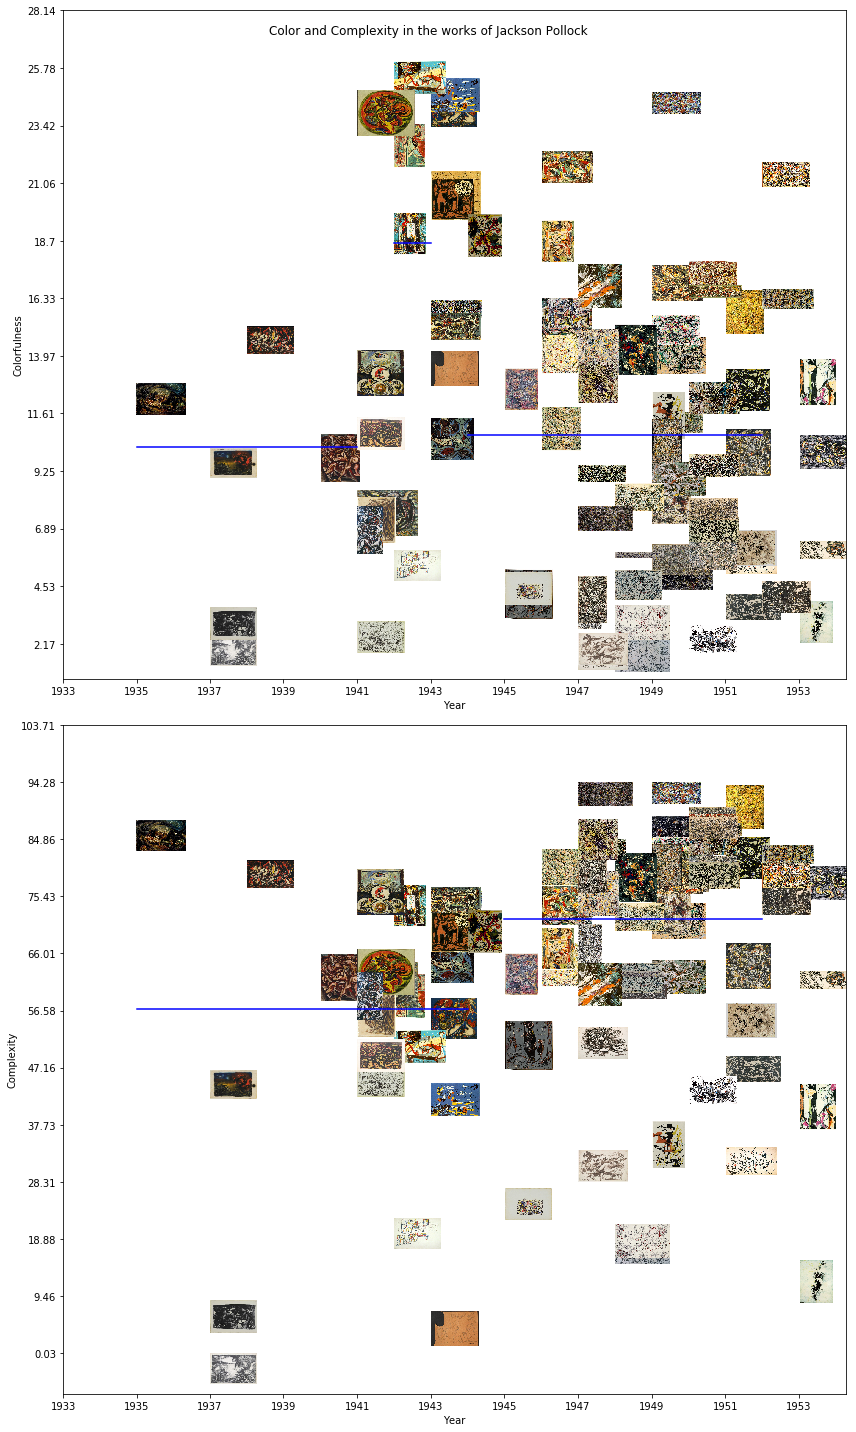

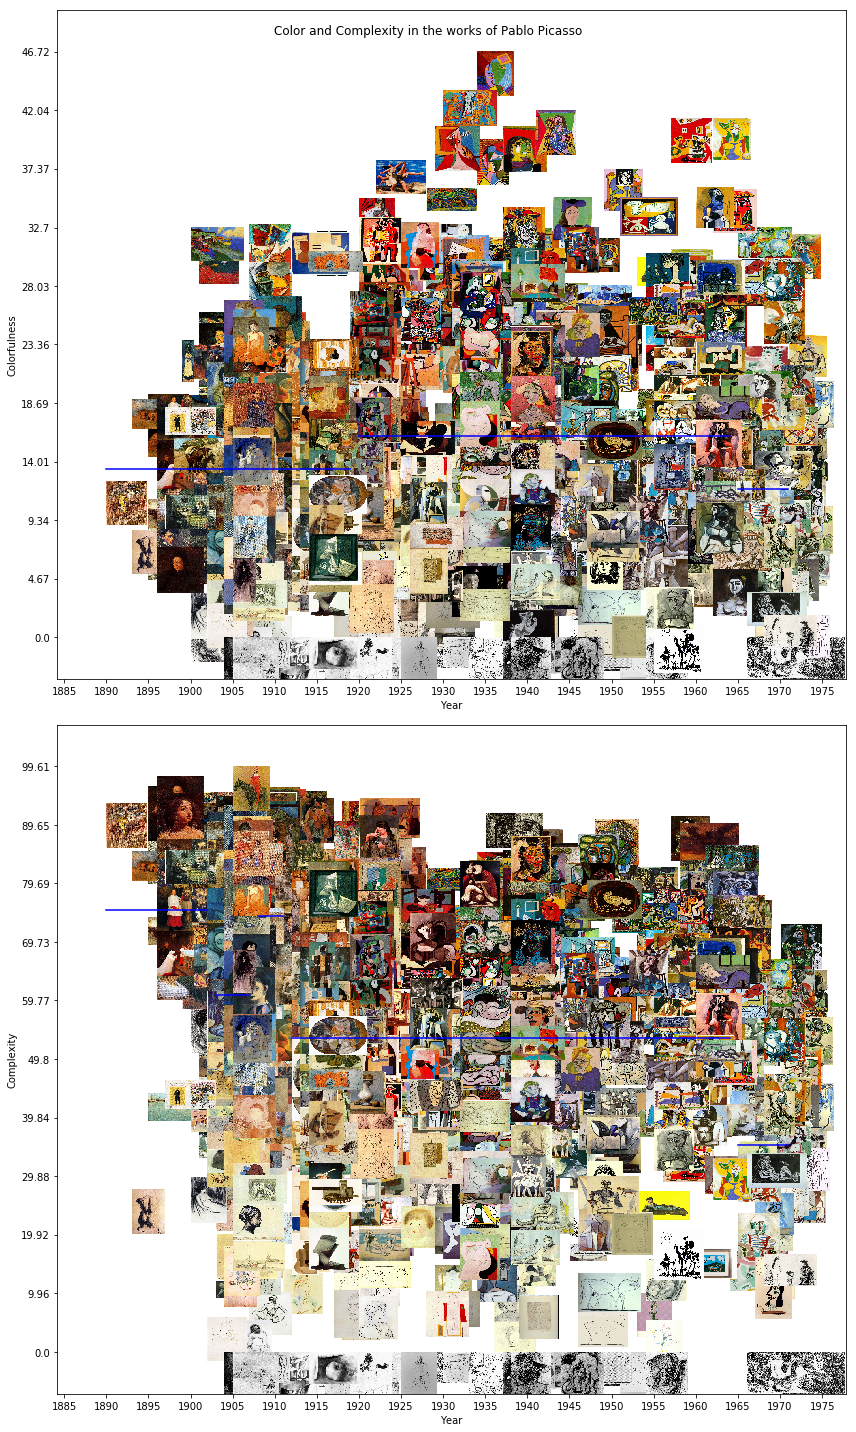

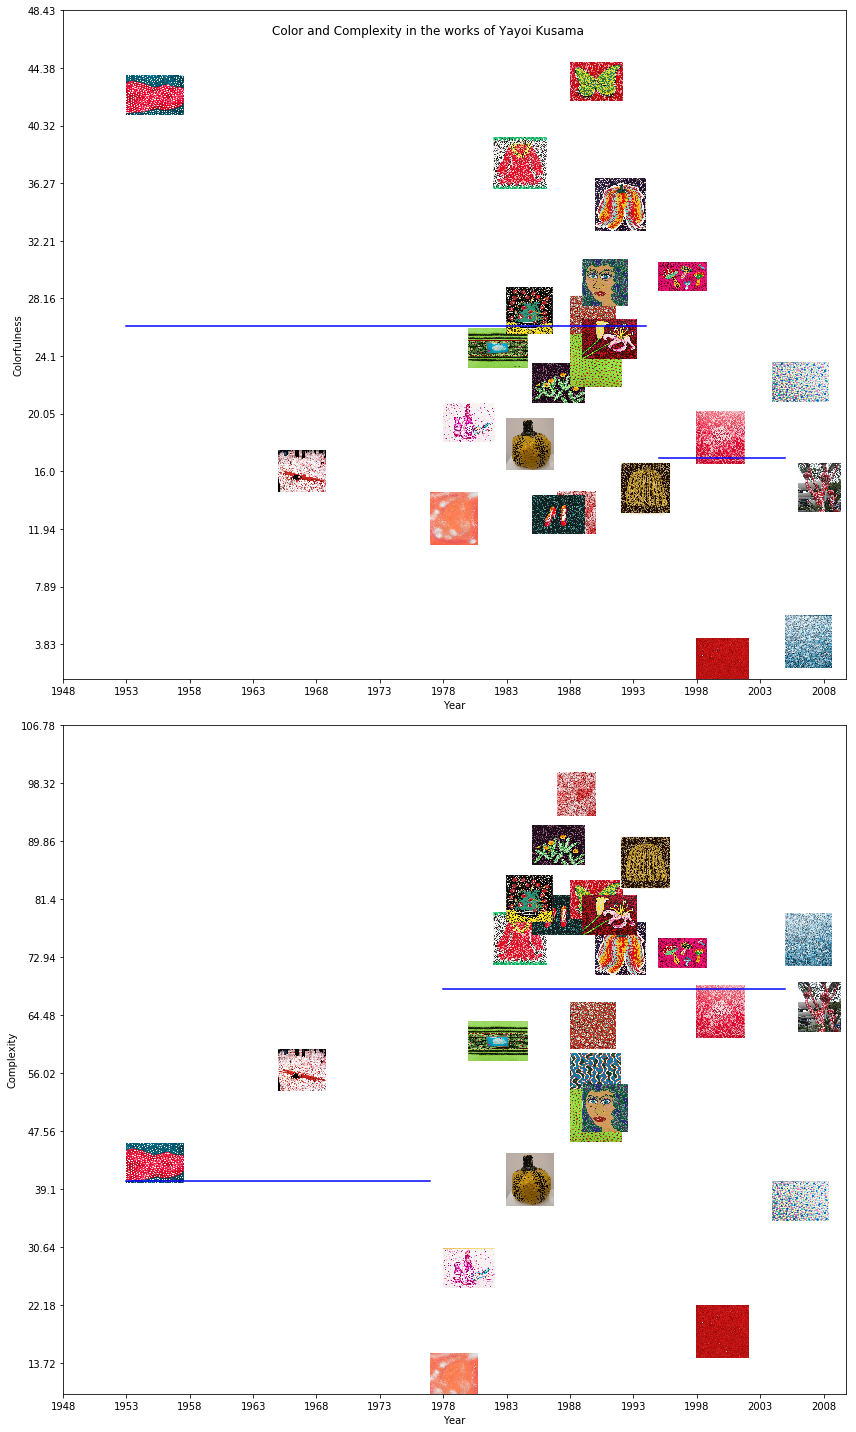

In [9]:
for artist in artist_names:
    mask = (years != 'unknown-year') & (names == artist)
    years_no_nan = np.array([int(y) for y in np.array(years)[mask]])
    colorfulness_no_nan = colorfulness[mask]
    complexity_no_nan = complexity[mask]
    image_paths_no_nan = np.array(image_paths)[mask]
    
    # plot images and constant periodization, without mean
    fig, ax = plt.subplots(2,1, figsize=(12,20))
    visual_plot.visual_plot(years_no_nan, colorfulness_no_nan, image_paths_no_nan, ax=ax[0], model='constant', means=False, target_image_resolution=125)
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Colorfulness')
    visual_plot.visual_plot(years_no_nan, complexity_no_nan, image_paths_no_nan, ax=ax[1], model='constant', means=False, target_image_resolution=125)
    ax[1].set_xlabel('Year')
    ax[1].set_ylabel('Complexity')
    name = artist.split('-')
    plt.suptitle('Color and Complexity in the works of ' + ' '.join(name).title())
    plt.tight_layout()
    plt.show()

In [10]:
artist = 'mark-rothko'

mask = (years != 'unknown-year') & (names == artist)
years_no_nan = np.array([int(y) for y in np.array(years)[mask]])
colorfulness_no_nan = colorfulness[mask]
complexity_no_nan = complexity[mask]
image_paths_no_nan = np.array(image_paths)[mask]

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(6,10))
visual_plot.visual_plot(years_no_nan, colorfulness_no_nan, image_paths_no_nan, ax=ax[0], model='constant', means=False, target_image_resolution=125)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Colorfulness')